In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob
import pandas

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
EB_path = "./EB/"
EB_list = sorted(glob.glob(EB_path+"*.dat"), key=str.lower)
RR_path = "./rr_lyrae/"
RR_list = sorted(glob.glob(RR_path+"*.dat"), key=str.lower)

In [3]:
frame_list = []
for EB_file in EB_list:
    frame = pandas.read_csv(EB_file, sep='\t')
    frame_list.append(frame)
    #print(frame.columns)
print(frame.columns[1:])
print("n lc: "+str(len(frame_list)))

Index(['MJD', 'MAG_KRON', 'MAGERR_KRON'], dtype='object')
n lc: 77


In [4]:
rr_frame_list = []
for RR_file in RR_list:
    frame = pandas.read_csv(RR_file, sep='\t')
    rr_frame_list.append(frame)
    #print(frame.columns)
print(frame.columns[1:])
print("n lc: "+str(len(rr_frame_list)))

Index(['MJD', 'MAG_KRON', 'MAGERR_KRON'], dtype='object')
n lc: 111


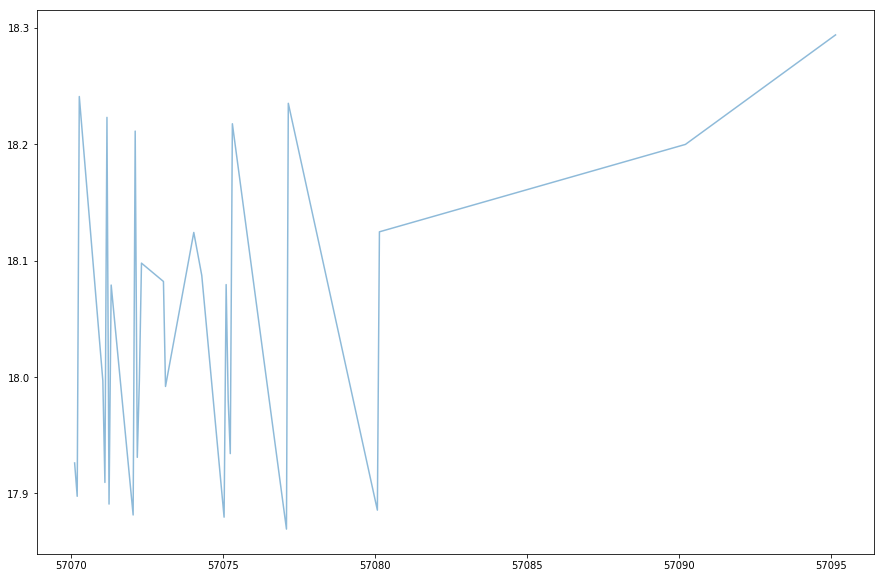

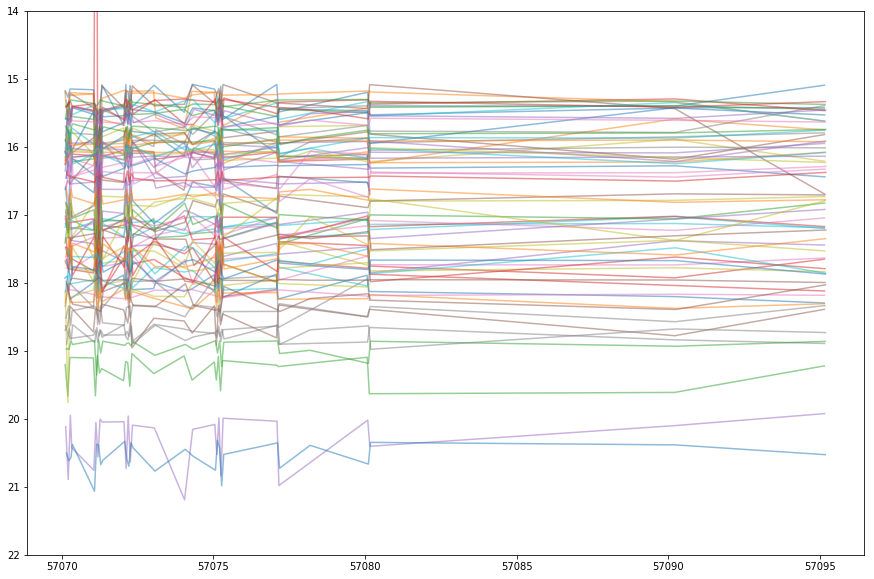

In [6]:
plt.figure(figsize=(15,10))
real_diff = []
eb_mag_values = []
for eb in frame_list:
    plt.plot(eb["MJD"].values, eb["MAG_KRON"].values, alpha=0.5)
    eb_mag_values.append(eb["MAG_KRON"].values)
    real_diff.append(np.abs(np.amin(eb["MAG_KRON"])-np.amax(eb["MAG_KRON"]))/np.mean(eb["MAG_KRON"]))
real_diff = np.array(real_diff)
eb_mag_values = np.concatenate(eb_mag_values)
plt.ylim([22, 14])
plt.show()

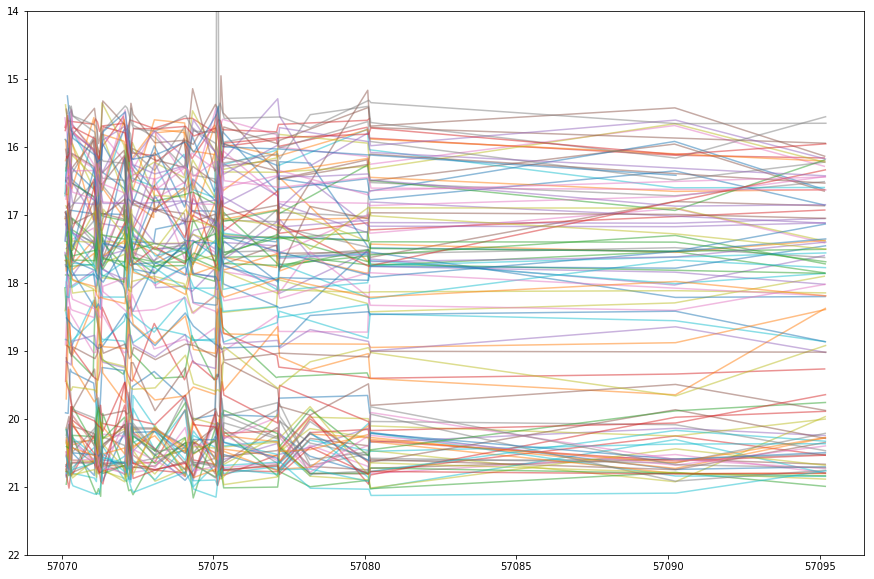

In [7]:
plt.figure(figsize=(15,10))
rr_real_diff = []
rr_mag_values = []
for eb in rr_frame_list:
    #print(eb["MAG_KRON"].values)
    rr_mag_values.append(eb["MAG_KRON"].values)
    plt.plot(eb["MJD"].values, eb["MAG_KRON"].values, alpha=0.5)
    rr_real_diff.append(np.abs(np.amin(eb["MAG_KRON"])-np.amax(eb["MAG_KRON"]))/np.mean(eb["MAG_KRON"]))
rr_real_diff = np.array(rr_real_diff)
rr_mag_values = np.concatenate(rr_mag_values)
plt.ylim([22, 14])
plt.show()

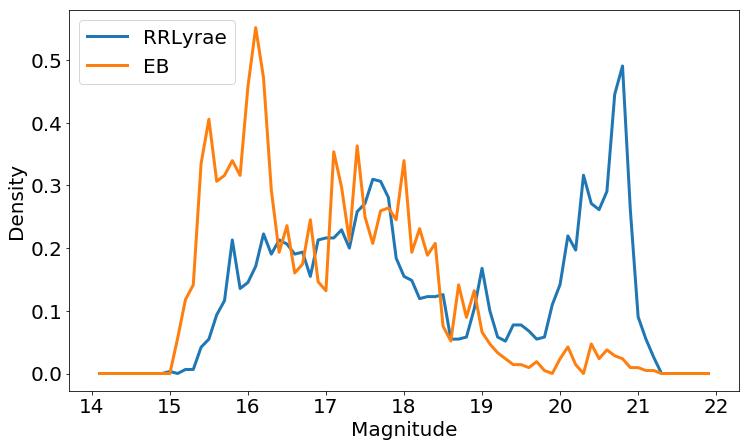

In [8]:
plt.figure(figsize=(12,7))
bins = np.arange(start=14, stop=22, step=0.1)
rr_h, _ = np.histogram(rr_mag_values, bins=bins, density=True)
eb_h, _ = np.histogram(eb_mag_values, bins=bins, density=True)
plt.plot(bins[1:], rr_h, lw=3, label="RRLyrae")
plt.plot(bins[1:], eb_h, lw=3, label="EB")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Magnitude", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [9]:
sim_images = h5py.File("/home/rodrigo/supernovae_detection/simulated_data/image_sequences/may19.hdf5", "r")

In [10]:
eb_lightcurves = []
for field in list(sim_images.keys()):
    field_type = sim_images[field]["lc_type"][:]
    eb_index = np.where(field_type == "EclipsingBinaries")[0]
    #print(eb_index)
    for index in eb_index:
        aux_dict = {}
        aux_dict["days"] = sim_images[field]["obs_cond"]["obs_day"]["g"][:]
        aux_dict["lightcurve"] = sim_images[field]["lightcurves"]["g"][index, :]
        eb_lightcurves.append(aux_dict)
#len(eb_lightcurves)

490


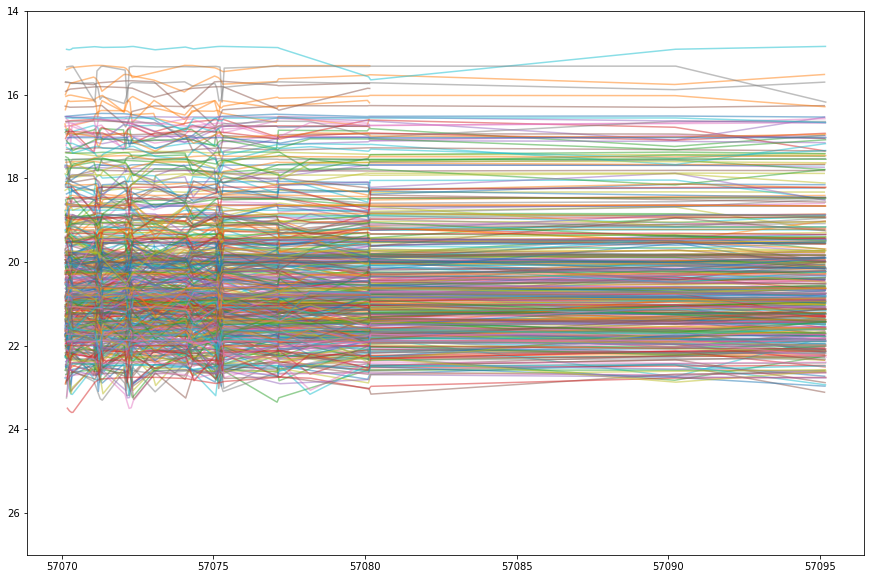

In [11]:
plt.figure(figsize=(15,10))
sim_diff = []
for eb in eb_lightcurves:
        plt.plot(eb["days"], eb["lightcurve"], alpha=0.5)
        sim_diff.append(np.abs(np.amin(eb["lightcurve"])-np.amax(eb["lightcurve"]))/np.mean(eb["lightcurve"]))
plt.ylim([27, 14])
print(len(sim_diff))
plt.show()

In [12]:
print(np.amin(real_diff), np.amax(real_diff))
print(np.amin(sim_diff), np.amax(sim_diff))

0.007352341340005272 0.6177676759619103
0.001616462 0.05567128


In [14]:
len(real_diff[real_diff<2.5])

72

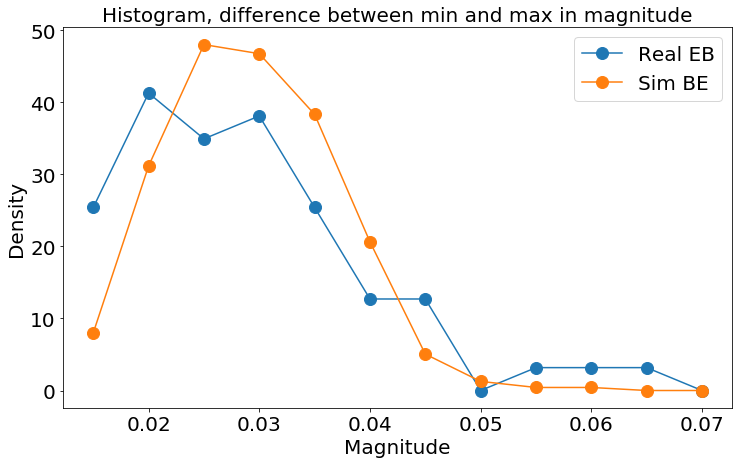

In [17]:
plt.figure(figsize=(12,7))
bins = np.arange(start=0.01, stop=0.075, step=0.005)
h_real, _ = np.histogram(real_diff, bins=bins, density=True)
h_sim, _ = np.histogram(sim_diff, bins=bins, density=True)
plt.plot(bins[1:], h_real, "-o", ms=12,label="Real EB")
plt.plot(bins[1:], h_sim, "-o", ms=12, label="Sim BE")
plt.title("Histogram, difference between min and max in magnitude", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Magnitude", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [29]:
not_filtered_eb = h5py.File("/home/rodrigo/supernovae_detection/simulated_data/lightcurves/not_filtered_eb100.hdf5", "r")
filtered_eb = h5py.File("/home/rodrigo/supernovae_detection/simulated_data/lightcurves/filtered_eb100.hdf5", "r")

In [32]:
list(filtered_eb["Field01"]["lightcurves"]["g"].shape)

[100, 29]

In [34]:
without_criteria = []
with_criteria = []
for field in list(filtered_eb.keys()):
    with_criteria.append(np.mean(filtered_eb[field]["lightcurves"]["g"][:], axis=1))
    without_criteria.append(np.mean(not_filtered_eb[field]["lightcurves"]["g"][:], axis=1))
with_criteria = np.concatenate(with_criteria, axis=0)
without_criteria = np.concatenate(without_criteria, axis=0)

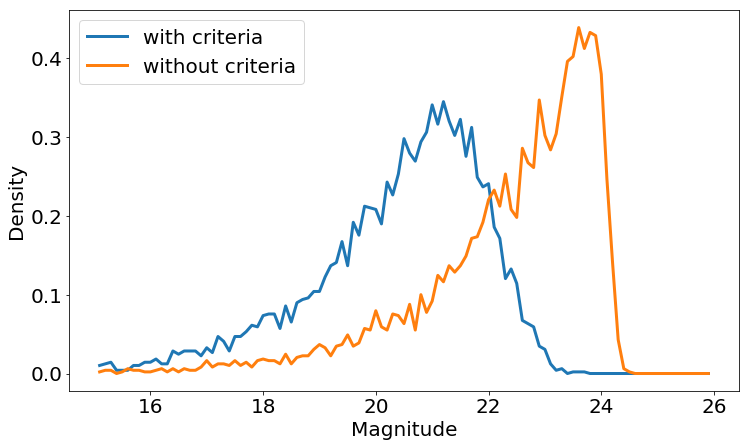

In [40]:
plt.figure(figsize=(12,7))
bins = np.arange(15, 26, step=0.1)
h_with, _ = np.histogram(with_criteria, bins=bins, density=True)
h_without, _ = np.histogram(without_criteria, bins=bins, density=True)
plt.plot(bins[1:], h_with, lw=3, label="with criteria")
plt.plot(bins[1:], h_without, lw=3,label="without criteria")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("Magnitude", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(fontsize=20)
plt.show()